[4.  1.  2.  3.  3.  0.  3.  2.  5.  5.  5.  0.  1.  3.  2.  3.  5.  0.
 3.  4.  5.  5.  4.  3.1 5.  5.  0.  0.  3.  2.  2.  4.  2.  2.  4.  3.
 3.  1.  4.  5.  1.  3.  5.  3.  0.  3.  1.  2. ]

Validation MAE for Random Forest Model: 0.002083333333333335

The dataset row most similar to the Sun is : 219

Temperature (K)                   8250
Luminosity(L/Lo)                  9.25
Radius(R/Ro)                      1.93
Absolute magnitude(Mv)           -0.98
Star type                            3
Star color                yellow-white
Spectral Class                       F
Name: 219, dtype: object


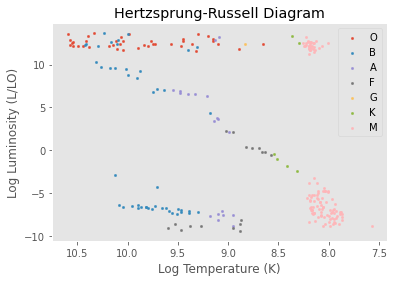

In [4]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity

#Load the data and drop any rows missing the star type
star_data = pd.read_csv('/kaggle/input/star-dataset/6 class csv.csv')
star_data.dropna(axis=0, subset=['Star type'], inplace=True )

#PART 1 - HERTZSPRUNG-RUSSELL DIAGRAM
#Create the grid
plt.style.use('ggplot')
plt.grid()

#Identify the different categrories of Spectral Class
spec_class_cat = ['O','B','A','F','G','K','M']

#For each teach for each spectral class, the Temperature and Luminosity is found and graphed
for z in spec_class_cat:
    cat_dataset = star_data[star_data['Spectral Class'] == z]
    plt.scatter(np.log(cat_dataset["Temperature (K)"]), np.log(cat_dataset["Luminosity(L/Lo)"]),5,label=z)

#Labels for the axis of the graphs 
plt.gca().invert_xaxis()
plt.title("Hertzsprung-Russell Diagram")
plt.ylabel("Log Luminosity (L/LO)")
plt.xlabel("Log Temperature (K)")
plt.legend()


#PART 2A - MACHINE LEARNING TO PREDICT STAR TYPES
#Separating Target data from the rest
y = star_data['Star type']

#Creating X, will be used to predict the star type 
features = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)','Absolute magnitude(Mv)', 'Star color', 'Spectral Class']
X = star_data[features]

#One-hot encoder to turn categorical data into numeric data (star color and Spectral Class)
one_hot_encode_X = pd.get_dummies(X)

#Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(one_hot_encode_X.values, y.values, random_state=1, train_size=0.8, test_size=0.2)

#Define Model. chose the random Forest Regressor
rf_model = RandomForestRegressor(random_state=1, n_estimators=60)

#Fit Model
rf_model.fit(train_X, train_y)

#Get predicted prices on validation data
rf_val_predictions = rf_model.predict(val_X)

#Calculate Mean Absolute Error
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)


#Print the Predicted Star Type and the Mean Absolute Error
print(rf_model.predict(val_X))
print("\nValidation MAE for Random Forest Model: {:,}".format(rf_val_mae))

#IF YOU WANT TO TEST USER INPUT, UNCOMMENT THE LINES BELOW AND COMMENT THE BLOCK OF CODE DIRECTLY ABOVE
# user_input = input("Enter integer (between 0 - 239): ")
# chosen_row = val_X[int(user_input)].reshape(1, -1)
# print("\nThe predicted star type to the row inputted is : {:,}".format(rf_model.predict(chosen_row)))
# print("\nValidation MAE for Random Forest Model: {:,}".format(rf_val_mae))

#PART 2B - FIND THE ROW MOST SIMILAR TO THE SUN
#Establish the data of Sun needed to find the most similar to the sun and add it to the end of the dataset
star_data.loc[240] = [5778, 1, 1, -26.74, 2, "White", 'G']

#Create a separate verseion that does a one-hot encoding to turn the categorical data into numeric
encoded_star_data = pd.get_dummies(star_data)

#Separate the new encoded sun data from the rest of the dataset
sun_data = ((encoded_star_data.iloc[240]).array).reshape(1, -1)

#Delete the added sun data from the star dataset
encoded_star_data = encoded_star_data.drop(labels=240, axis=0)
star_data = star_data.drop(labels=240, axis=0)

#Using the encoded star dataset and sun data, find the closest match using cosine similarity
similarity_scores = cosine_similarity(encoded_star_data, sun_data)
most_similar_index = similarity_scores.argmax()

#Print the star that is most similar to the sun and print the information present about the dataset
print("\nThe dataset row most similar to the Sun is : {:,}\n".format(most_similar_index))
print(star_data.iloc[most_similar_index ]) 